In [1]:
import pandas as pd
import seaborn as sns

import math

from NoNa.nona import nona

df = pd.read_csv("train.csv")

C:\Users\Игорь.А\AppData\Local\Temp\ipykernel_6968\1576872552.py:8: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,131,132,133,135,136,139,140,141,142,143,144,145,146,147,148,149,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,171,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,223,224,227,239,240,241,242,243,244,245,246,459,460,461,467,468,469,515,516,523,524,531,532,539,540,547,548,555,556,563,564,565,567,571,572,573,575,579,580,581,582,583,587,588,595,596,603,604,611,612,613,615,795,796,797,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1041,1042,1043,1044,1045,1047,1048,1049,1050,1051,1052,1055,1056,1057,1058,1059,1060,1063,1064,1065,1067,1068,1069,1072,1073,1074,1075,1076,1077,1078,1172,1173,1174,1176,1177,1178,1179,1180,1181,1182,1275,1276,1277,1278,1279,1280,1281,1282,1447,1448,1449,14

<Axes: >

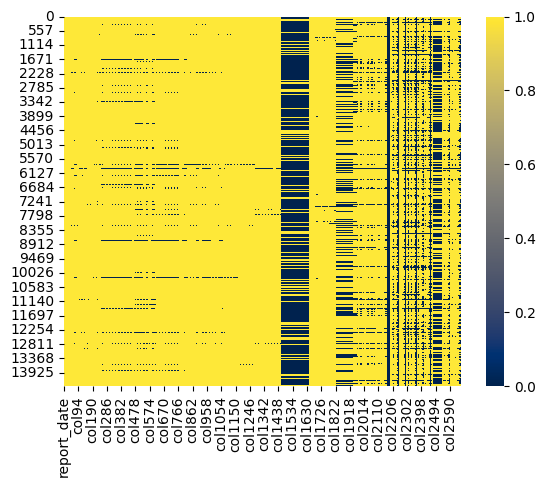

In [2]:
sns.heatmap(df.isnull(), cmap='cividis')

_____________________________________________________________________________________________________________________________________________________________________________________________

Сортировка по id и удаление str

In [40]:
df = df.sort_values('client_id')

df = df.select_dtypes(exclude=['object'])

df.to_csv('train.csv', index=False, encoding='utf-8-sig')

_____________________________________________________________________________________________________________________________________________________________________________________________

Слияние

In [41]:
#############################################################################################################################################

df = pd.read_csv("train.csv")

#############################################################################################################################################

grouped = df.groupby('client_id')

asist = []
data = {}
s = 0

for e in df.columns:
    data[e] = []

for elm in grouped:

    for i in df.columns:
        l = s

        while math.isnan(elm[1][i][l]) and l < len(elm[1][i]) - 1 + s: l += 1

        data[i].append(elm[1][i][l])

    s += len(elm[1][i])

df = pd.DataFrame(data)
df.to_csv("train.csv", index=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4817 entries, 0 to 4816
Columns: 2319 entries, client_id to col2663
dtypes: float64(2316), int64(3)
memory usage: 85.2 MB


_____________________________________________________________________________________________________________________________________________________________________________________________

Удаление молозаполненных столбцов

In [42]:
dn = []
percent = 8

for elm in df.columns:
    nop = len(df) - df.isnull().sum()[elm]
    if nop < len(df) / 100 * percent: 
        dn.append(elm)
        print(elm)

df = df.drop(dn, axis=1)

df.info()

col1
col2
col3
col4
col5
col6
col7
col8
col9
col10
col11
col12
col13
col14
col15
col16
col17
col18
col19
col20
col21
col22
col23
col24
col25
col26
col27
col28
col29
col30
col31
col32
col33
col34
col35
col36
col37
col38
col39
col40
col41
col42
col43
col44
col45
col46
col47
col48
col65
col66
col67
col68
col69
col70
col71
col72
col73
col74
col75
col76
col77
col78
col79
col80
col81
col82
col83
col84
col101
col102
col103
col104
col105
col106
col107
col108
col109
col110
col111
col112
col113
col114
col115
col116
col117
col118
col119
col120
col121
col122
col123
col125
col126
col127
col177
col178
col179
col180
col197
col198
col199
col200
col217
col218
col219
col229
col230
col231
col232
col233
col234
col235
col236
col245
col246
col249
col250
col253
col254
col257
col258
col261
col262
col265
col266
col269
col270
col273
col274
col277
col278
col281
col282
col285
col286
col289
col290
col293
col294
col297
col298
col301
col302
col305
col306
col309
col310
col313
col314
col317
col318
col321
col322
col325

_____________________________________________________________________________________________________________________________________________________________________________________________

Удаление столбиков где мение 2 уникальных элементов

In [43]:
dn = []

for elm in df.columns:
    nuv = df[elm].nunique()
    if nuv < 2: 
        dn.append(elm)
        print(elm)

df = df.drop(dn, axis=1) 

col1479
col1480
col1481
col1482
col1483
col1484
col1485
col1486
col1495
col1503
col1519
col1527
col1528
col1529
col1530
col1531
col1532
col1533
col1534
col1535
col1536
col1537
col1538
col1539
col1540
col1541
col1542
col1543
col1544
col1545
col1546
col1547
col1548
col1549
col1550
col1551
col1552
col1553
col1554
col1555
col1556
col1557
col1558
col1559
col1560
col1561
col1562
col1563
col1564
col1565
col1566
col1567
col1568
col1569
col1570
col1571
col1572
col1573
col1574
col1575
col1576
col1577
col1578
col1579
col1580
col1581
col1582
col1583
col1584
col1585
col1586
col1587
col1588
col1589
col1590
col1591
col1592
col1593
col1594
col1595
col1596
col1597
col1598
col1599
col1600
col1601
col1602
col1603
col1604
col1605
col1606
col1607
col1608
col1609
col1610
col1611
col1612
col1613
col1614
col1615
col1616
col1617
col1618
col1619
col1620
col1621
col1622
col1623
col1624
col1625
col1626
col1627
col1628
col1629
col1630
col1631
col1632
col1633
col1634
col1635
col1636
col1637
col1638
col1639
col1640


_____________________________________________________________________________________________________________________________________________________________________________________________
Удаление маловлиятельных столбцов

In [44]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

ln = ['client_id']

percent = 10

for elm in numeric_df.columns:

    asis = df[elm].corr(df['target'])
    if asis >= percent / 100: ln.append(elm)
    else: print(f'{elm}:{asis}')

#############################################################################################################################################

dn = list(df.columns)

for elm in ln: dn.remove(elm)

df = df.drop(dn, axis=1)

client_id:0.04213484499242676
col124:-0.05070844140769926
col128:-0.06886417705481689
col220:-0.10903241100953946
col247:-0.009811267432548648
col248:-0.018441076049790263
col251:0.07417978046140247
col252:0.06762436164113618
col255:-0.02965514022611885
col256:0.021442057332489665
col259:-0.05260774777126485
col260:-0.035963927321901
col263:-0.0236618684305863
col264:-0.02267700545030168
col267:-0.07017982224140457
col268:-0.1079502745009115
col271:0.030251536878995233
col272:0.02741629873716862
col275:0.03480556710168145
col276:-0.0022088853745067744
col279:0.026906754100445303
col280:0.051523173956733864
col283:0.037724424174264914
col284:0.07599353473829076
col287:0.021359090387606014
col288:0.062172103249016245
col291:0.017109348090324595
col292:0.06488403155741783
col295:0.023365042031265788
col296:0.07151130930836437
col299:-0.006452216680782345
col300:-0.009549655146488163
col303:0.06037424973062062
col304:0.0029417132455257767
col307:0.039545387770565675
col308:0.01054748106038

_____________________________________________________________________________________________________________________________________________________________________________________________

Удаление молозаполненных строк

In [45]:
percent = 8

# Вычисляем порогое значение для пропусков
threshold = (100 - percent) / 100 * len(df.columns)

# Удаляем строки с количеством пропусков больше 8%
df = df.dropna(thresh=len(df.columns) - threshold)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4575 entries, 0 to 4816
Columns: 197 entries, client_id to col2608
dtypes: float64(195), int64(2)
memory usage: 6.9 MB


_____________________________________________________________________________________________________________________________________________________________________________________________

Заполнение пропусков

100%|██████████| 196/196 [00:12<00:00, 16.17it/s]


<Axes: >

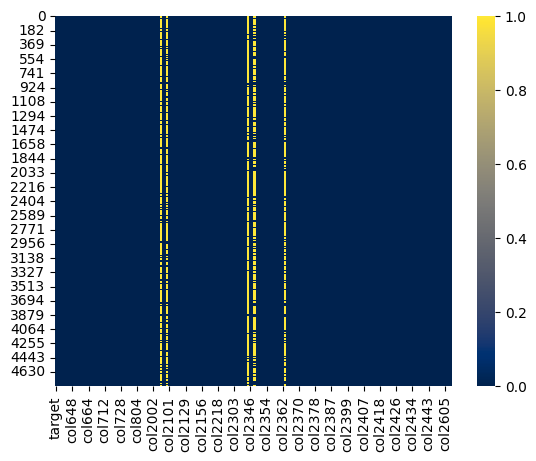

In [46]:
df = df.drop(['client_id'], axis=1)

data = df

nona(df)

sns.heatmap(df.isnull(), cmap='cividis', annot_kws={'size': 15000})

In [47]:
data = data.dropna(subset=data.columns)

change_n = []

for elm in data.columns:

    for i in data[elm]:
        if isinstance(i, int): break

        if not i.is_integer(): 
            change_n.append(elm)

            break

for elm in df.columns:
    nop = len(df) - df.isnull().sum()[elm]
    if nop < len(df): df = df.drop(elm, axis=1)

for elm in change_n:
    try: df[elm] = df[elm].astype(int)
    except KeyError: pass

df.to_csv('train.csv', index=False, encoding='utf-8-sig')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4575 entries, 0 to 4816
Columns: 191 entries, target to col2608
dtypes: float64(39), int64(152)
memory usage: 6.8 MB
